## **EDA for Machine Learning rating Data**

### **Import modules and modular codes**

In [88]:
import pandas as pd
import time
import os
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import os
import sys
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Adjust based on your project structure
sys.path.append(root_dir)
from src.data_transformer import *
from src.data_loader import load_data
#from src.data_transformer import convert_timestamp, cap_wind_speeds, impute_missing_values
from src.data_analyzer import get_summary_statistics, detect_missing_values
#from src.visualizer import plot_distributions, plot_boxplots, plot_combined_visuals
from src.utils import save_dataframe
# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)

print(f"Added {root_dir} to sys.path")

Current working directory: e:\KAIM\Insurance-Risk-Analytics-Predictive-Modeling\notebook
Python path: ['C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling\\venv', '', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling\\venv\\Lib\\site-packages', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling\\venv\\Lib\\site-packages\\win32', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling\\venv\\Lib\\site-packages\\win32\\lib', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling\\venv\\Lib\\site-packages\\Pythonwin', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling', 'e:\\KAIM\\Insurance-Risk-Analytics-Predictive-Modeling', 'e:\\KAIM\\Insurance-Risk-Analytics-Predi

In [89]:
# Set Seaborn style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### **Extract the Data**

In [118]:
# Load data
file_path = os.path.join('..', 'data', 'MachineLearningRating_v3.txt')
df = load_data(file_path)
df.head()

e:\KAIM\Insurance-Risk-Analytics-Predictive-Modeling\src\data_loader.py:27: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|' ,encoding='utf-8')
2025-06-15 19:12:18,802 - INFO - Successfully loaded data from ..\data\MachineLearningRating_v3.txt with 1000098 rows


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### **Data Summarization**

#### Summary Statistics

In [103]:
# Summary statistics
print("Summary Statistics:")
stats = get_summary_statistics(df)
print(stats)

Summary Statistics:


2025-06-15 18:20:41,808 - INFO - Computed summary statistics


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

### **Data Quality Assessment**

##### Missing Values

In [104]:
# Missing value detection
print("\nMissing Value Detection:")
missing_counts, missing_percentages = detect_missing_values(df)
print("Count of missing values:\n", missing_counts)
print("Percentage of missing values:\n", missing_percentages.round(2))


Missing Value Detection:


2025-06-15 18:20:54,331 - INFO - Detected missing values


Count of missing values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
Nu

In [105]:
# 2. Data Quality Assessment: Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


#### Drop High Percentage of Missing Values

In [106]:
# Set threshold for missing values (e.g., 80%)
threshold = 0.7

# Find columns with more than 80% missing values
high_missing_cols = df.columns[df.isnull().mean() > threshold]

# Drop them
df.drop(columns=high_missing_cols, inplace=True)

# Optionally, print the dropped columns
print("Dropped columns with >70% missing values:", list(high_missing_cols))


Dropped columns with >70% missing values: ['CustomValueEstimate', 'CrossBorder', 'NumberOfVehiclesInFleet']


### Data Types

In [107]:
# Data type identification
print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
N

In [109]:
# 1. Data Summarization
# Define numerical and categorical columns
possible_numerical_cols = [
    'TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate'
]
numerical_cols = [col for col in possible_numerical_cols if col in df.columns]
if not numerical_cols:
    print("Warning: No numerical columns found. Please check dataset.")
    numerical_cols = []

possible_categorical_cols = ['Province', 'VehicleType', 'Gender', 'CoverType', 'PostalCode', 'Make']
categorical_cols = [col for col in possible_categorical_cols if col in df.columns]
if not categorical_cols:
    print("Warning: No categorical columns found. Please check dataset.")
    categorical_cols = []

# Clean numerical columns (handle comma-separated formats)
for col in numerical_cols:
    if df[col].dtype == 'object':  # Check if column is string
        try:
            # Replace commas with periods and convert to float
            df[col] = df[col].str.replace(',', '.', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except Exception as e:
            print(f"Error converting {col} to numeric: {e}")


In [111]:
# Descriptive Statistics for numerical columns
if numerical_cols:
    desc_stats = df[numerical_cols].describe()
    print("\nDescriptive Statistics for Numerical Columns:")
    print(desc_stats)

    # Calculate variability (coefficient of variation = std / mean)
    variability = df[numerical_cols].std() / df[numerical_cols].mean()
    print("\nCoefficient of Variation (Std/Mean):")
    print(variability)
else:
    print("\nNo numerical columns available for descriptive statistics.")


Descriptive Statistics for Numerical Columns:
       TotalPremium   TotalClaims    SumInsured
count  1.000098e+06  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05
std    2.302845e+02  2.384075e+03  1.508332e+06
min   -7.825768e+02 -1.200241e+04  1.000000e-02
25%    0.000000e+00  0.000000e+00  5.000000e+03
50%    2.178333e+00  0.000000e+00  7.500000e+03
75%    2.192982e+01  0.000000e+00  2.500000e+05
max    6.528260e+04  3.930921e+05  1.263620e+07

Coefficient of Variation (Std/Mean):
TotalPremium     3.719936
TotalClaims     36.756567
SumInsured       2.496524
dtype: float64


In [119]:
# Convert TransactionMonth to datetime if present
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("\nTransactionMonth converted to datetime.")
df['TransactionMonth'].head()


TransactionMonth converted to datetime.


0   2015-03-01
1   2015-05-01
2   2015-07-01
3   2015-05-01
4   2015-07-01
Name: TransactionMonth, dtype: datetime64[ns]

In [120]:
# 2. Data Quality Assessment: Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


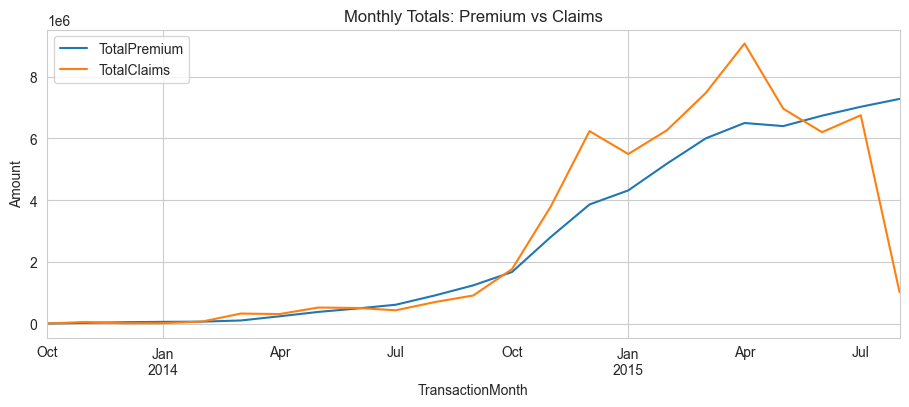

In [121]:
monthly = (
    df.dropna(subset=['TransactionMonth'])
      .groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalPremium','TotalClaims']].sum()
)
monthly.index = monthly.index.to_timestamp()
monthly.plot(figsize=(11,4), title='Monthly Totals: Premium vs Claims')
plt.ylabel('Amount'); plt.show()

### **Univariate Analysis**

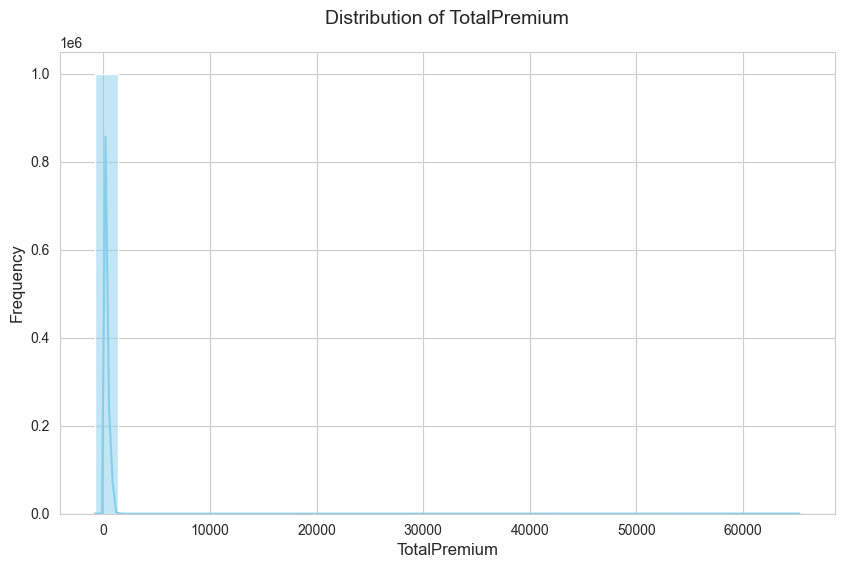

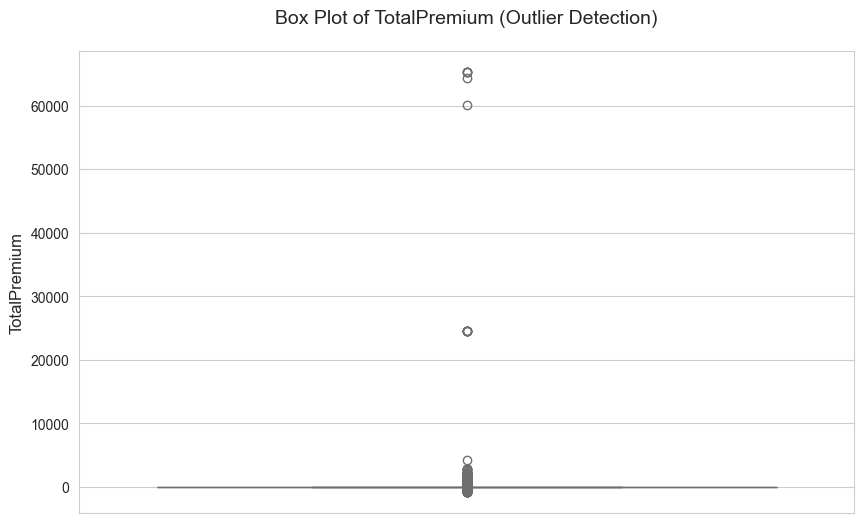

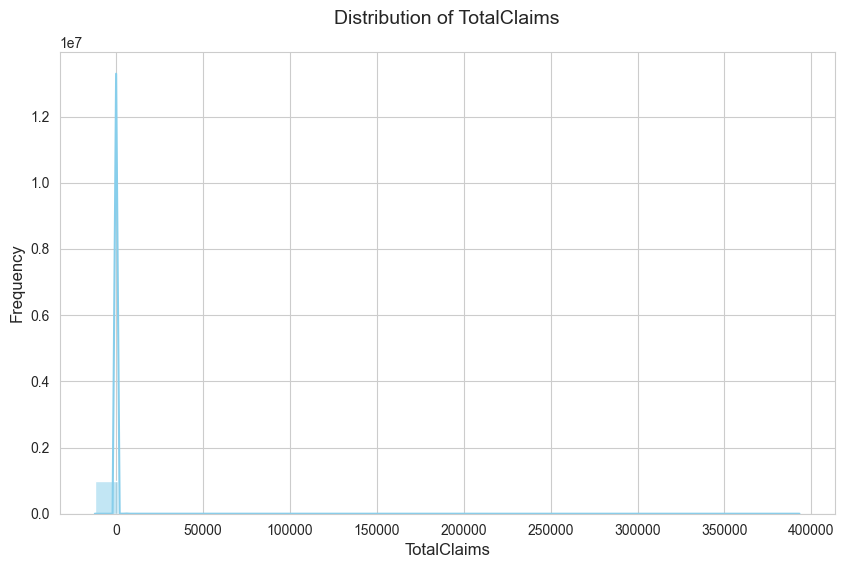

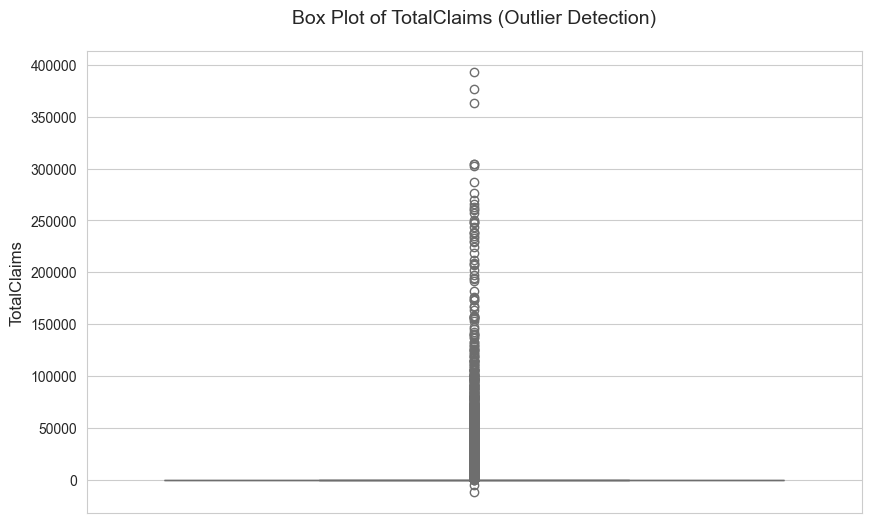

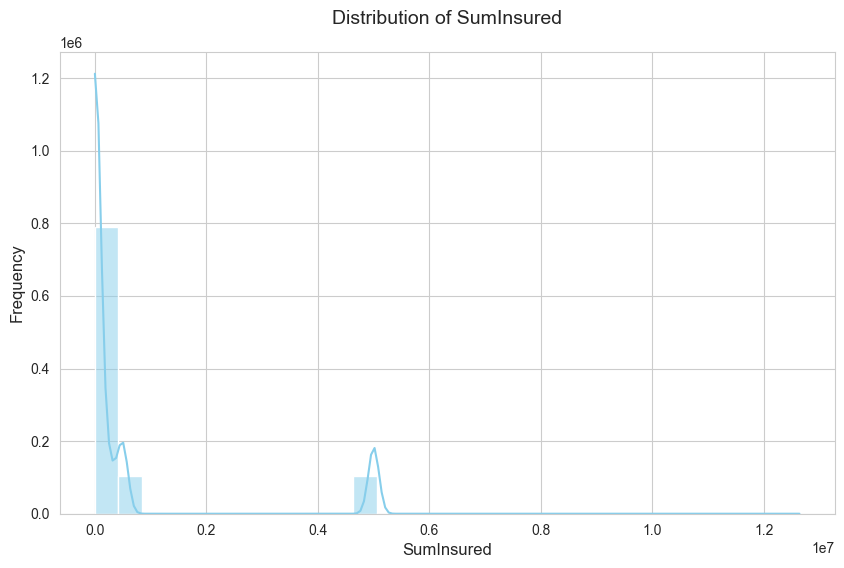

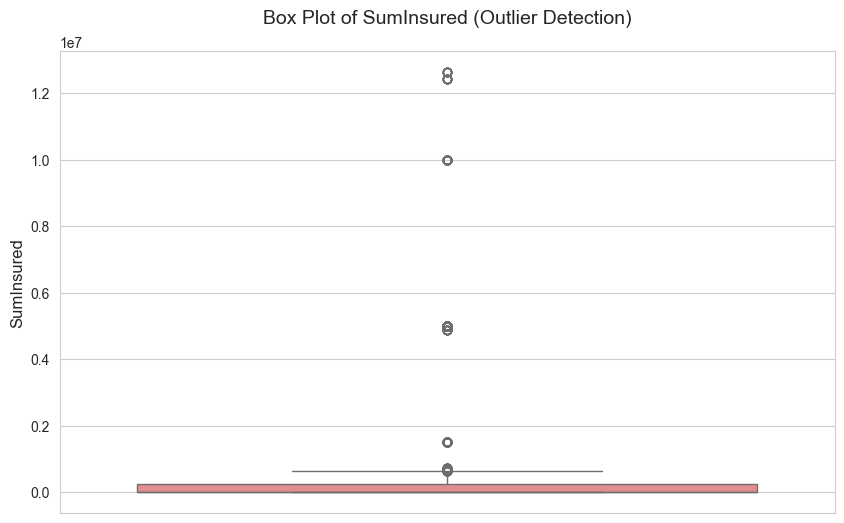

In [122]:
# 1. Univariate Analysis: Numerical Columns
for col in numerical_cols:
    # Histogram with KDE
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14, pad=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show

    # Box plot for outlier detection
    plt.figure()
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col} (Outlier Detection)', fontsize=14, pad=20)
    plt.ylabel(col, fontsize=12)
    plt.show

C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_39024\1344228760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


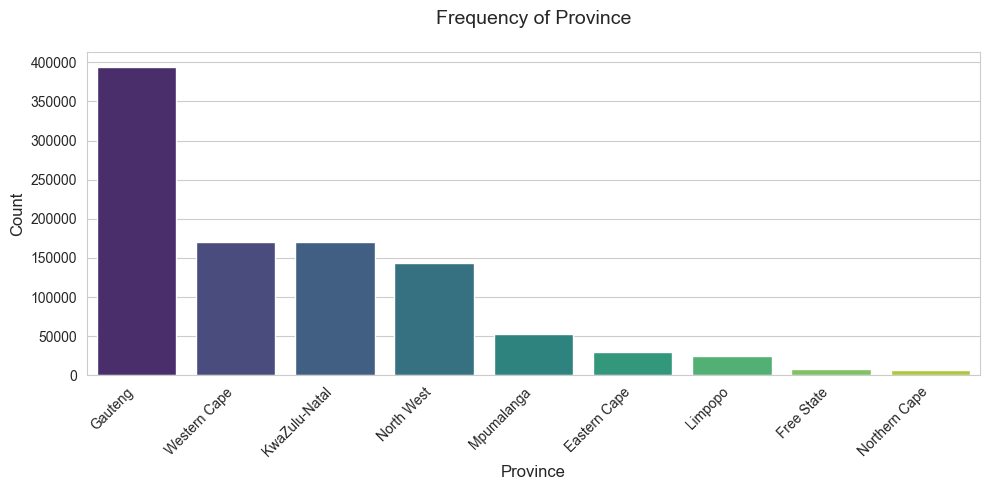

C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_39024\1344228760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


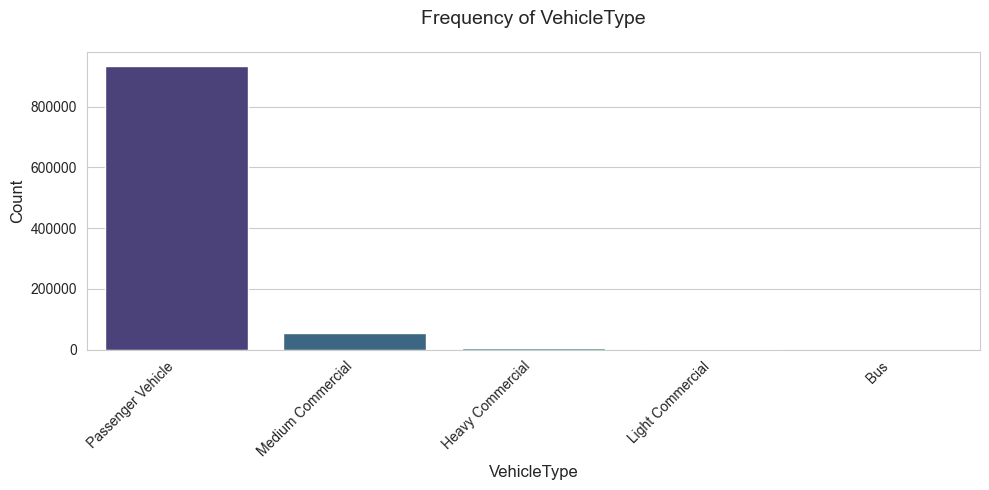

C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_39024\1344228760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


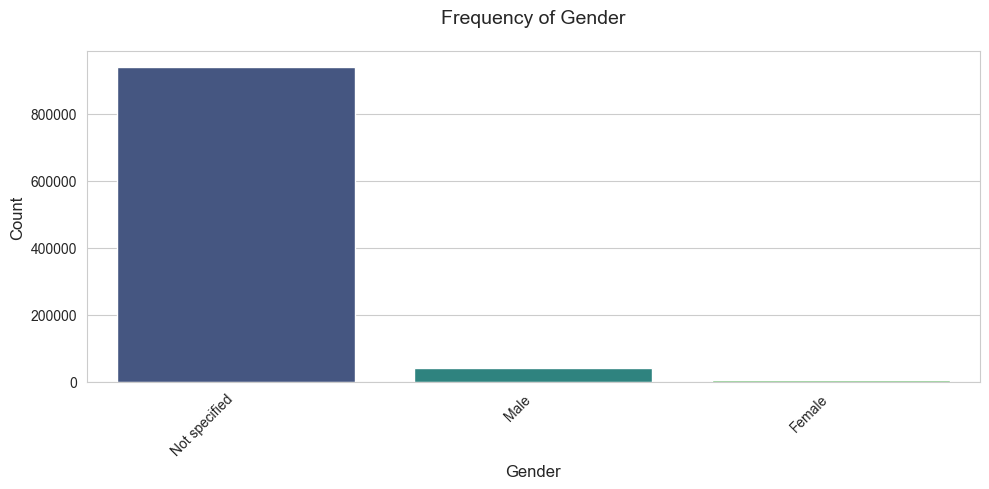

C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_39024\1344228760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


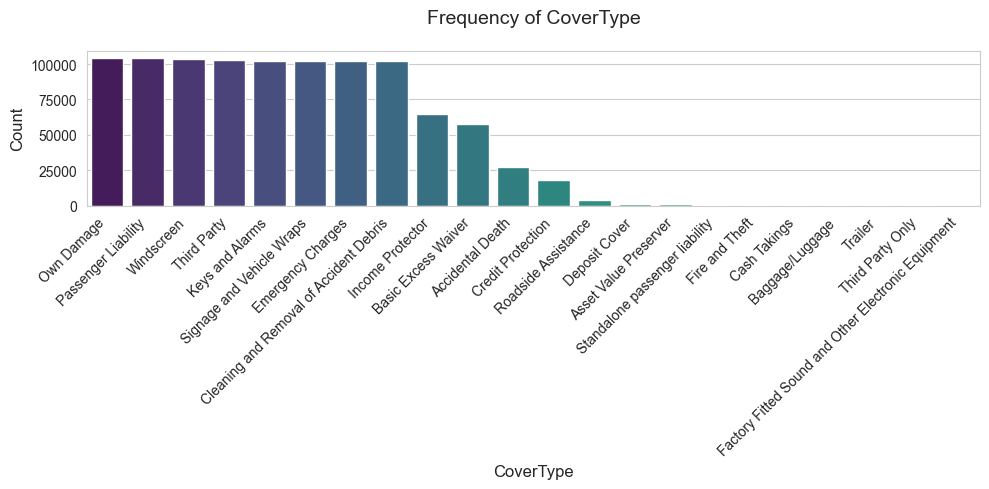

2025-06-15 19:16:51,835 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_39024\1344228760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')
2025-06-15 19:16:52,809 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


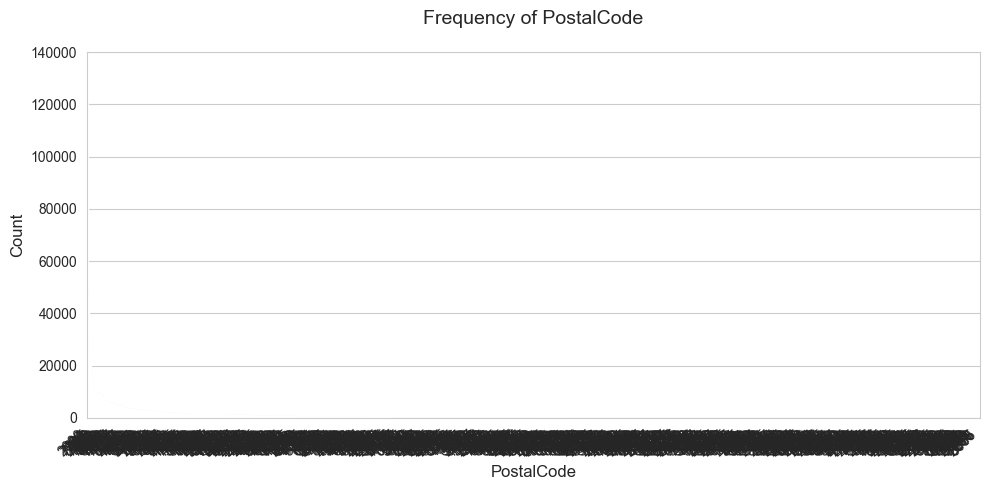

In [124]:
# Univariate Analysis: Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # Countplot (sorted by frequency)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='viridis')

    plt.title(f'Frequency of {col}', fontsize=14, pad=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Bivariate or Multivariate Analysis